In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [3]:
cars = pd.read_csv("Japan_used_cars_datasets.csv")
cars.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [4]:
cars.shape

(2318, 11)

In [5]:
cars.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [6]:
cars.mark.unique()

array(['nissan', 'toyota', 'daihatsu', 'volkswagen', 'mazda', 'honda',
       'subaru', 'mercedes-benz', 'kubota', 'mitsubishi', 'suzuki', 'bmw',
       'chrysler', 'smart', 'gm', 'opel', 'isuzu', 'land rover',
       'peugeot', 'hyundai', 'kia motors', 'audi', 'citroen', 'mitsuoka',
       'volvo', 'ford', 'hino', 'jaguar'], dtype=object)

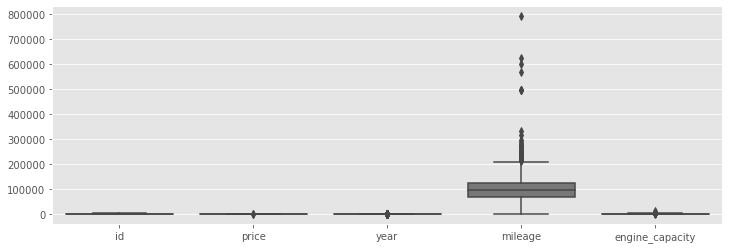

In [7]:
plt.figure(figsize=(12,4))
sns.boxplot(data=cars);

In [8]:
#removed outlier
cars = cars[cars.mileage!=800000]

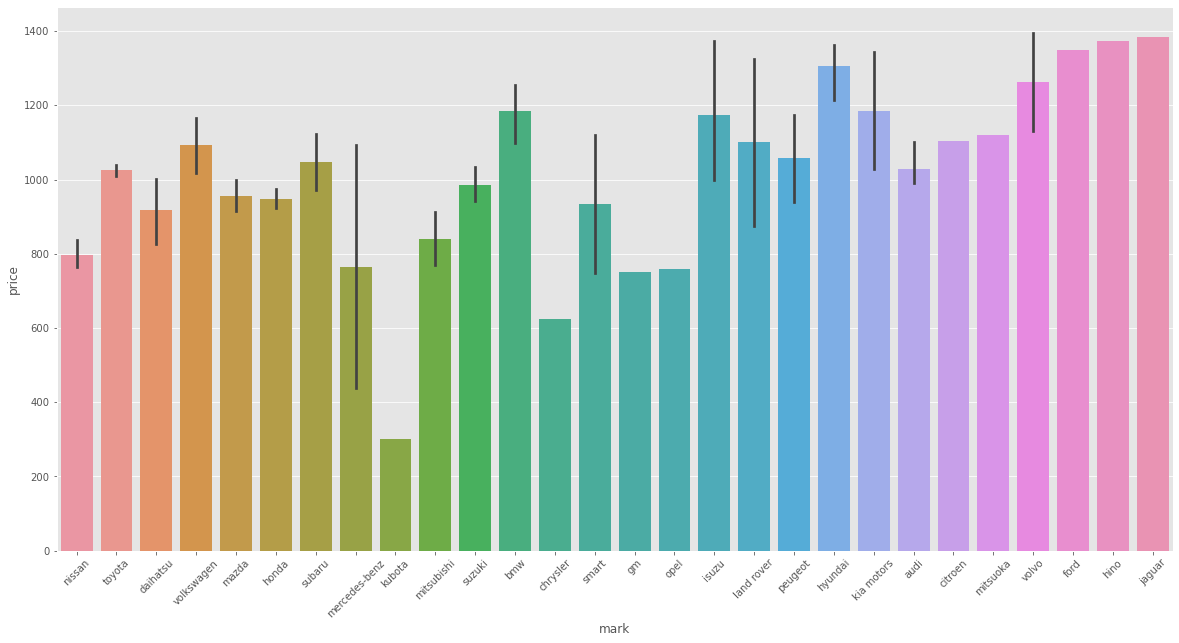

In [9]:
plt.figure(figsize=(20,10))
sns.barplot(data=cars,x='mark',y='price')
plt.xticks(rotation=45);

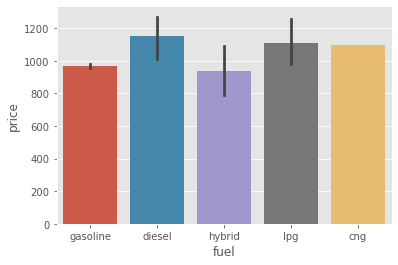

In [10]:
sns.barplot(data=cars,x='fuel',y='price');

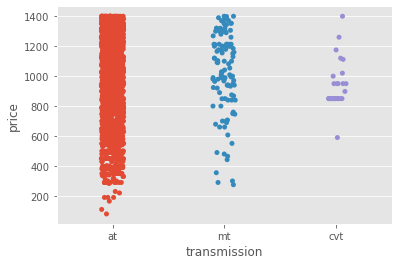

In [11]:
sns.stripplot(data=cars,x='transmission',y='price');

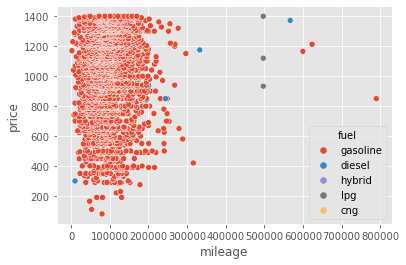

In [12]:
sns.scatterplot(data=cars,x='mileage',y='price',hue='fuel');

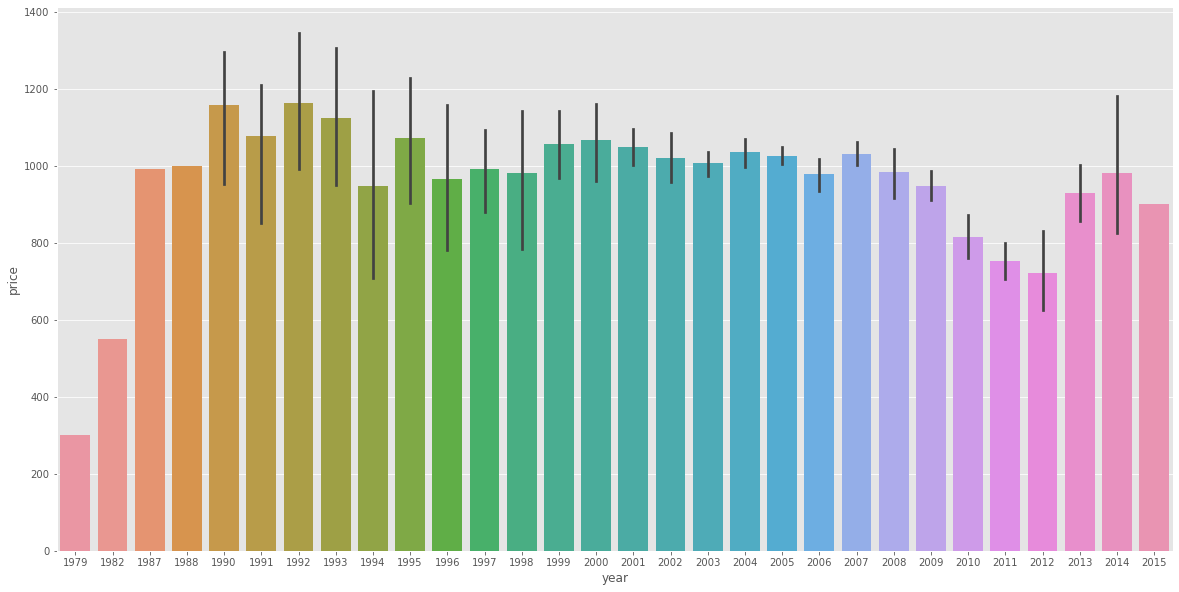

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(data=cars,x='year',y='price');

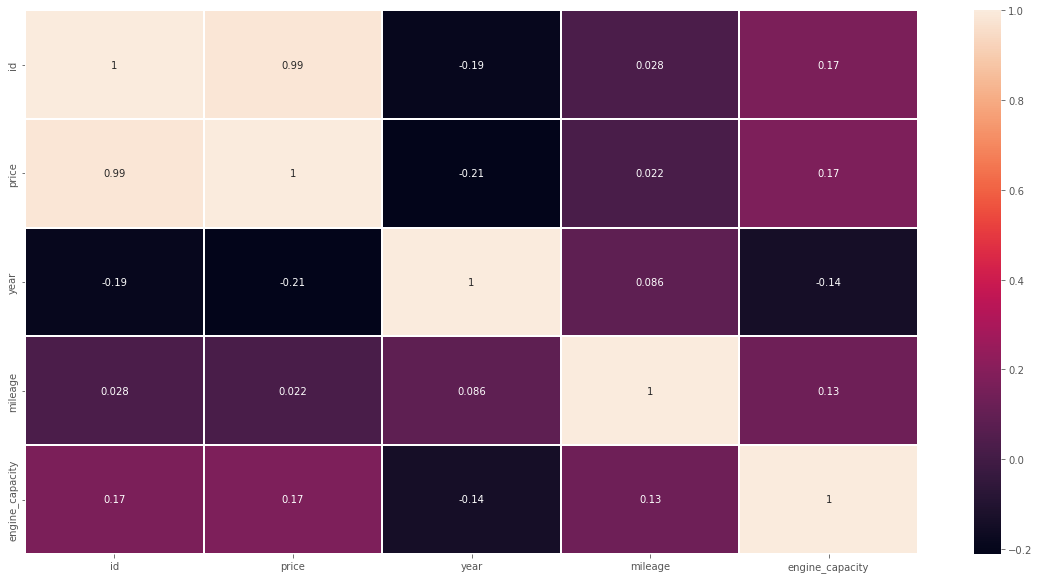

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(cars.corr(),annot=True,linewidths=0.2);

In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [28]:
x = cars.drop(['price'],axis=1)
y = cars['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=4)

In [29]:
print(x.shape,x_test.shape,x_train.shape)

(2318, 10) (580, 10) (1738, 10)


In [30]:
#feature selection
X_fs = x[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Brand']]

y_fs = x['Price']


y_fs = y_fs*100
y_fs = y_fs.astype(int)


bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_fs,y_fs)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_fs.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
fea = pd.DataFrame(featureScores.nlargest(10,'Score'))
print(featureScores.nlargest(10,'Score'))  #print 10 best features

KeyError: "None of [Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',\n       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand'],\n      dtype='object')] are in the [columns]"